In [1]:
import numpy as np
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import xarray as xr

In [2]:
H = 25
k = 1
t = 0
g = 9.81
c = np.sqrt(g*H)
a = c/g

In [3]:
y = np.arange(-2000, 2100, 10)*1000
x = np.arange(-2000, 2100, 10)*1000 # got from -2pi to pi

In [4]:
x, y = np.meshgrid(x, y)

In [5]:
B = 2.28E-11

# Beta value taken from: https://www.ncl.ucar.edu/Document/Functions/Contributed/beta_dfdy_rossby.shtml

In [6]:
n_prime = a*np.exp(-B*(y**2))*np.exp(1/(2*c))*np.cos((k*x)-t)

In [13]:
u_prime = (a*g*np.exp(-B*(y**2))*np.exp(1/(2*c))*np.cos((k*x)-t))/c

In [14]:
n_prime.min(), n_prime.max()

(-1.648021969270616, 1.648167918328372)

In [15]:
u_prime

array([[ 1.92380651e-40, -1.32114288e-40,  5.92060053e-41, ...,
        -2.84379239e-41, -5.03084714e-41,  1.24240886e-40],
       [ 4.77801784e-40, -3.28122615e-40,  1.47045634e-40, ...,
        -7.06291963e-41, -1.24947479e-40,  3.08568022e-40],
       [ 1.18128247e-39, -8.11226552e-40,  3.63544960e-40, ...,
        -1.74618502e-40, -3.08911083e-40,  7.62881195e-40],
       ...,
       [ 2.90473179e-43, -1.99477738e-43,  8.93944193e-44, ...,
        -4.29380717e-44, -7.59601422e-44,  1.87589786e-43],
       [ 1.12765591e-43, -7.74399380e-44,  3.47041146e-44, ...,
        -1.66691363e-44, -2.94887478e-44,  7.28248752e-44],
       [ 4.35779482e-44, -2.99264481e-44,  1.34113083e-44, ...,
        -6.44174125e-45, -1.13958444e-44,  2.81429700e-44]])

In [16]:
y.shape, n_prime.shape

((410, 410), (410, 410))

In [17]:
u_prime.shape

(410, 410)

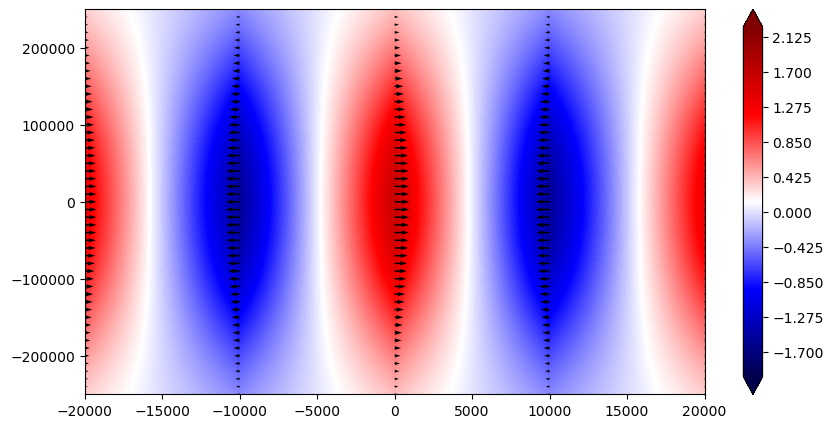

In [18]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1)
ax.set_ylim(-250000,250000)
ax.set_xlim(-20000,20000)
CF = ax.contourf(x, y, n_prime, levels=np.arange(-2, 2.25, .0025), extend='both', cmap='seismic')
plt.colorbar(CF)
ax.quiver(x, y, u_prime, 0, zorder=2)